# Project Name: Fake News Prediction
In these project we are given with different news along with their heading author and the main text and indicator whether these news are fake or not(1 for fake news 0 for not a fake news). Here our target is to build up a machine learning model that will tell us whether a news is fake Or not based on the title name and the author name of the news.

### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd

### Importing the Dataset

In [2]:
# importing data
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
# printing the dimension of the data
print(f'''
No. of Rows: {df.shape[0]}
No. of Columns: {df.shape[1]}''')


No. of Rows: 20800
No. of Columns: 5


In [4]:
# checking for missing values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# dropping the null values 
df = df.fillna('')

In [7]:
# Now we are going to combine the author name and the title
df['content'] = df['author'] + ' ' + df['title']
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


### Preprocessing

In [16]:
# stemming 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# tool to stem
port_stem = PorterStemmer()

# function that stem the content after ignoring the stop words
def stemming(content):
    stemmed_content = re.sub('[^a-zA-z]',' ', content).lower().split(' ')
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords.words('english')]
    return ' '.join(stemmed_content)

df['content'] = df['content'].apply(stemming)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sayan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# creating X and y variable
X = df['content']
y = df['label']

In [22]:
# converting X in vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [24]:
print(X)

  (0, 15697)	0.28485063562728646
  (0, 2485)	0.3676519686797209
  (0, 7698)	0.24785219520671603
  (0, 8636)	0.29212514087043684
  (0, 2962)	0.2468450128533713
  (0, 13480)	0.2565896679337957
  (0, 4979)	0.233316966909351
  (0, 268)	0.27010124977708766
  (0, 3795)	0.2705332480845492
  (0, 7012)	0.21874169089359144
  (0, 8915)	0.3635963806326075
  (0, 3603)	0.3598939188262559
  (1, 1895)	0.15521974226349364
  (1, 2224)	0.3827320386859759
  (1, 16812)	0.30071745655510157
  (1, 1498)	0.2939891562094648
  (1, 2816)	0.19094574062359204
  (1, 6823)	0.1904660198296849
  (1, 5510)	0.7143299355715573
  (1, 3571)	0.26373768806048464
  (2, 5396)	0.3866530551182615
  (2, 5975)	0.3474613386728292
  (2, 9625)	0.49351492943649944
  (2, 15622)	0.41544962664721613
  (2, 2946)	0.3179886800654691
  :	:
  (20797, 1288)	0.3353805680413986
  (20797, 13128)	0.24825263521976057
  (20797, 12350)	0.27263457663336677
  (20797, 14976)	0.3115945315488075
  (20797, 12144)	0.24778257724396505
  (20797, 9523)	0.295420

### Train-Test-Split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
# showing the shape of the splitted data
print(f'''
X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape}''')


X_train: (16640, 17141)
X_test: (4160, 17141)
y_train: (16640,)
y_test: (4160,)


### Model Training 

In [28]:
from sklearn.linear_model import LogisticRegression

# defining and fitting the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Model Accuracy

In [29]:
# getting the predicted values of X_train
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

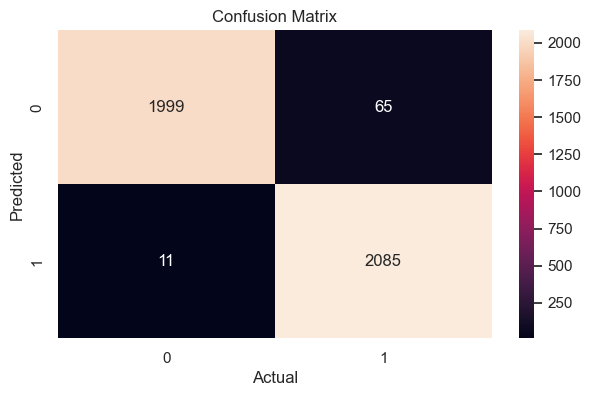

In [32]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plotting the confusion matrix
sns.set(rc={'figure.figsize':(7,4)})
sns.heatmap(cm, annot=True, cbar=True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')

# the proportion of correct prediction is very high 

In [33]:
# classification report 
from sklearn.metrics import classification_report

cf = classification_report(y_test, y_pred)
print(cf)

# precision and recall score for both fake news and real news is high

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2064
           1       0.97      0.99      0.98      2096

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160

